In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from glob import glob
from PIL import Image
import numpy as np
base_dir = '/content/drive/MyDrive/trafficnet_dataset_v1'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_dense_dir = os.path.join(train_dir, 'dense_traffic')
train_sparse_dir = os.path.join(train_dir, 'sparse_traffic')
test_dense_dir = os.path.join(test_dir, 'dense_traffic')
test_sparse_dir = os.path.join(test_dir, 'sparse_traffic')


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in glob(os.path.join(folder, '*.jpg')):  # Change '*.jpg' to your image format if different
        img = Image.open(filename)
        img = img.resize((128, 128))  # Resize to 128x128, adjust as needed
        images.append(np.array(img))
    return np.array(images)

# Load training images
train_dense_images = load_images_from_folder(train_dense_dir)
train_sparse_images = load_images_from_folder(train_sparse_dir)

# Load testing images
test_dense_images = load_images_from_folder(test_dense_dir)
test_sparse_images = load_images_from_folder(test_sparse_dir)


array([[[217, 220, 225],
        [227, 230, 235],
        [229, 232, 237],
        ...,
        [240, 241, 243],
        [240, 241, 243],
        [240, 241, 243]],

       [[222, 225, 230],
        [216, 219, 224],
        [230, 233, 238],
        ...,
        [240, 241, 243],
        [240, 241, 243],
        [240, 241, 243]],

       [[230, 233, 238],
        [232, 235, 240],
        [216, 219, 224],
        ...,
        [240, 241, 243],
        [240, 241, 243],
        [240, 241, 243]],

       ...,

       [[156, 140, 116],
        [164, 149, 125],
        [166, 151, 126],
        ...,
        [ 75,  71,  66],
        [ 42,  40,  37],
        [ 55,  54,  54]],

       [[161, 144, 119],
        [159, 142, 117],
        [156, 140, 114],
        ...,
        [138, 133, 124],
        [ 64,  61,  55],
        [ 38,  36,  32]],

       [[155, 138, 112],
        [150, 133, 107],
        [153, 136, 110],
        ...,
        [166, 160, 150],
        [129, 125, 117],
        [ 60,  57,  51]]], dtype=uint8)
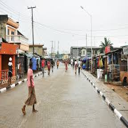

In [ ]:
train_sparse_images[44]

In [ ]:
# Combine the images and create labels
X_train_val = np.concatenate((train_dense_images, train_sparse_images), axis=0)
y_train_val =[1] * len(train_dense_images) + [0] * len(train_sparse_images)

X_test = np.array(np.concatenate((test_dense_images, test_sparse_images), axis=0))
y_test = np.array([1] * len(test_dense_images) + [0] * len(test_sparse_images))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
X_train_sc = X_train / 255.0 #Scaling
X_test_sc = X_test / 255.0
X_val_sc = X_val / 255.0


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
y_train = np.array(y_train)  #convering list to numpy arrays
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#Model arch
model = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
   # Conv2D(64, (3, 3), activation='relu'),     Too complex ->> overfitting
   # MaxPooling2D((2, 2)),


    Flatten(),
   # Dense(32, activation='relu'),       Too complex
    Dense(4, activation='relu'),
   # Dense(3, activation='relu'),
    Dense(4, activation='relu'),
    Dropout(0.30),    #regularization
    Dense(1, activation='sigmoid')
])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10)
#compile
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['acc'])

#fitting the model

early_Stop = EarlyStopping(monitor='val_loss',patience =3)
history = model.fit(X_train_sc, y_train, epochs=80, validation_data=(X_val_sc, y_val), callbacks=early_stop)

Epoch 1/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - acc: 0.5365 - loss: 0.6905 - val_acc: 0.6750 - val_loss: 0.6038
Epoch 2/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - acc: 0.6850 - loss: 0.6036 - val_acc: 0.8417 - val_loss: 0.5604
Epoch 3/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - acc: 0.7135 - loss: 0.5879 - val_acc: 0.8444 - val_loss: 0.5523
Epoch 4/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - acc: 0.7347 - loss: 0.5562 - val_acc: 0.8444 - val_loss: 0.5294
Epoch 5/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - acc: 0.7563 - loss: 0.5515 - val_acc: 0.8528 - val_loss: 0.4987
Epoch 6/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - acc: 0.7541 - loss: 0.5283 - val_acc: 0.8500 - val_loss: 0.4750
Epoch 7/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - acc: 0.7941 - loss: 0.4969 - val_acc: 0.8444 - val_loss: 0.4627
Epoch 8/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - acc: 0.8131 - loss: 0.4937 - val_acc: 0.8528 - val_loss: 0.4646
Epoch 9/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/st

<Axes: >

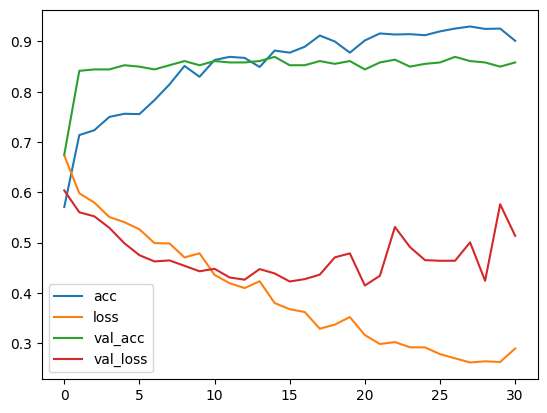

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

In [ ]:
y_pred = model.predict(X_test_sc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
y_pred = y_pred>0.5 #Converting labels to 0,1

In [ ]:
accuarcy = accuracy_score(y_test, y_pred)
print('accuracy score: ',accuarcy*100)  #Since data is balanced we'll use accuracy
recall = recall_score(y_test, y_pred)
print('recall score: ',recall*100)
precision = precision_score(y_test, y_pred)
print('precision score: ',precision*100)
f_1 = f1_score(y_test, y_pred)
print('f1 score: ',f_1*100)

accuracy score:  85.75
recall score:  88.0
precision score:  84.21052631578947
f1 score:  86.06356968215158


array([[[139, 166, 196],
        [139, 166, 197],
        [139, 165, 197],
        ...,
        [107, 141, 186],
        [107, 141, 186],
        [108, 142, 188]],

       [[140, 167, 198],
        [140, 166, 199],
        [139, 165, 198],
        ...,
        [108, 142, 187],
        [108, 142, 187],
        [109, 143, 188]],

       [[142, 168, 201],
        [140, 166, 200],
        [140, 166, 199],
        ...,
        [109, 143, 188],
        [109, 143, 188],
        [109, 143, 188]],

       ...,

       [[ 88,  90,  89],
        [ 89,  91,  89],
        [ 90,  92,  91],
        ...,
        [197, 170, 125],
        [197, 170, 125],
        [197, 170, 125]],

       [[ 83,  84,  87],
        [ 84,  86,  88],
        [ 84,  86,  88],
        ...,
        [197, 170, 125],
        [197, 170, 125],
        [197, 170, 125]],

       [[ 70,  76,  85],
        [ 71,  77,  85],
        [ 72,  78,  83],
        ...,
        [196, 169, 124],
        [195, 168, 123],
        [196, 169, 124]]], dtype=uint8)
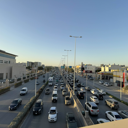

In [ ]:
img = Image.open('/IMG_0009.jpg')
img = img.resize((128, 128))  # Resize to 128x128, adjust as needed
img_ar = np.array(img)
img_ar


In [ ]:
prediction = model.predict(np.array([img_ar]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
prediction

array([[1.]], dtype=float32)

In [ ]:
T_f =prediction>0.5
if T_f == True:
  print('Traffic is dense')
  print('Accuarcy =',prediction*100,'%')
else:
  print('Traffic is sparse')
  print('Accuarcy =',(1-prediction)*100,'%')

Traffic is dense
Accuarcy = [[100.]] %
